# ATNEquations vs. Web Service comparison

## 1 plant and 1 animal

/Users/ben/miniconda3/envs/atn-tools/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/ben/miniconda3/envs/atn-tools/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


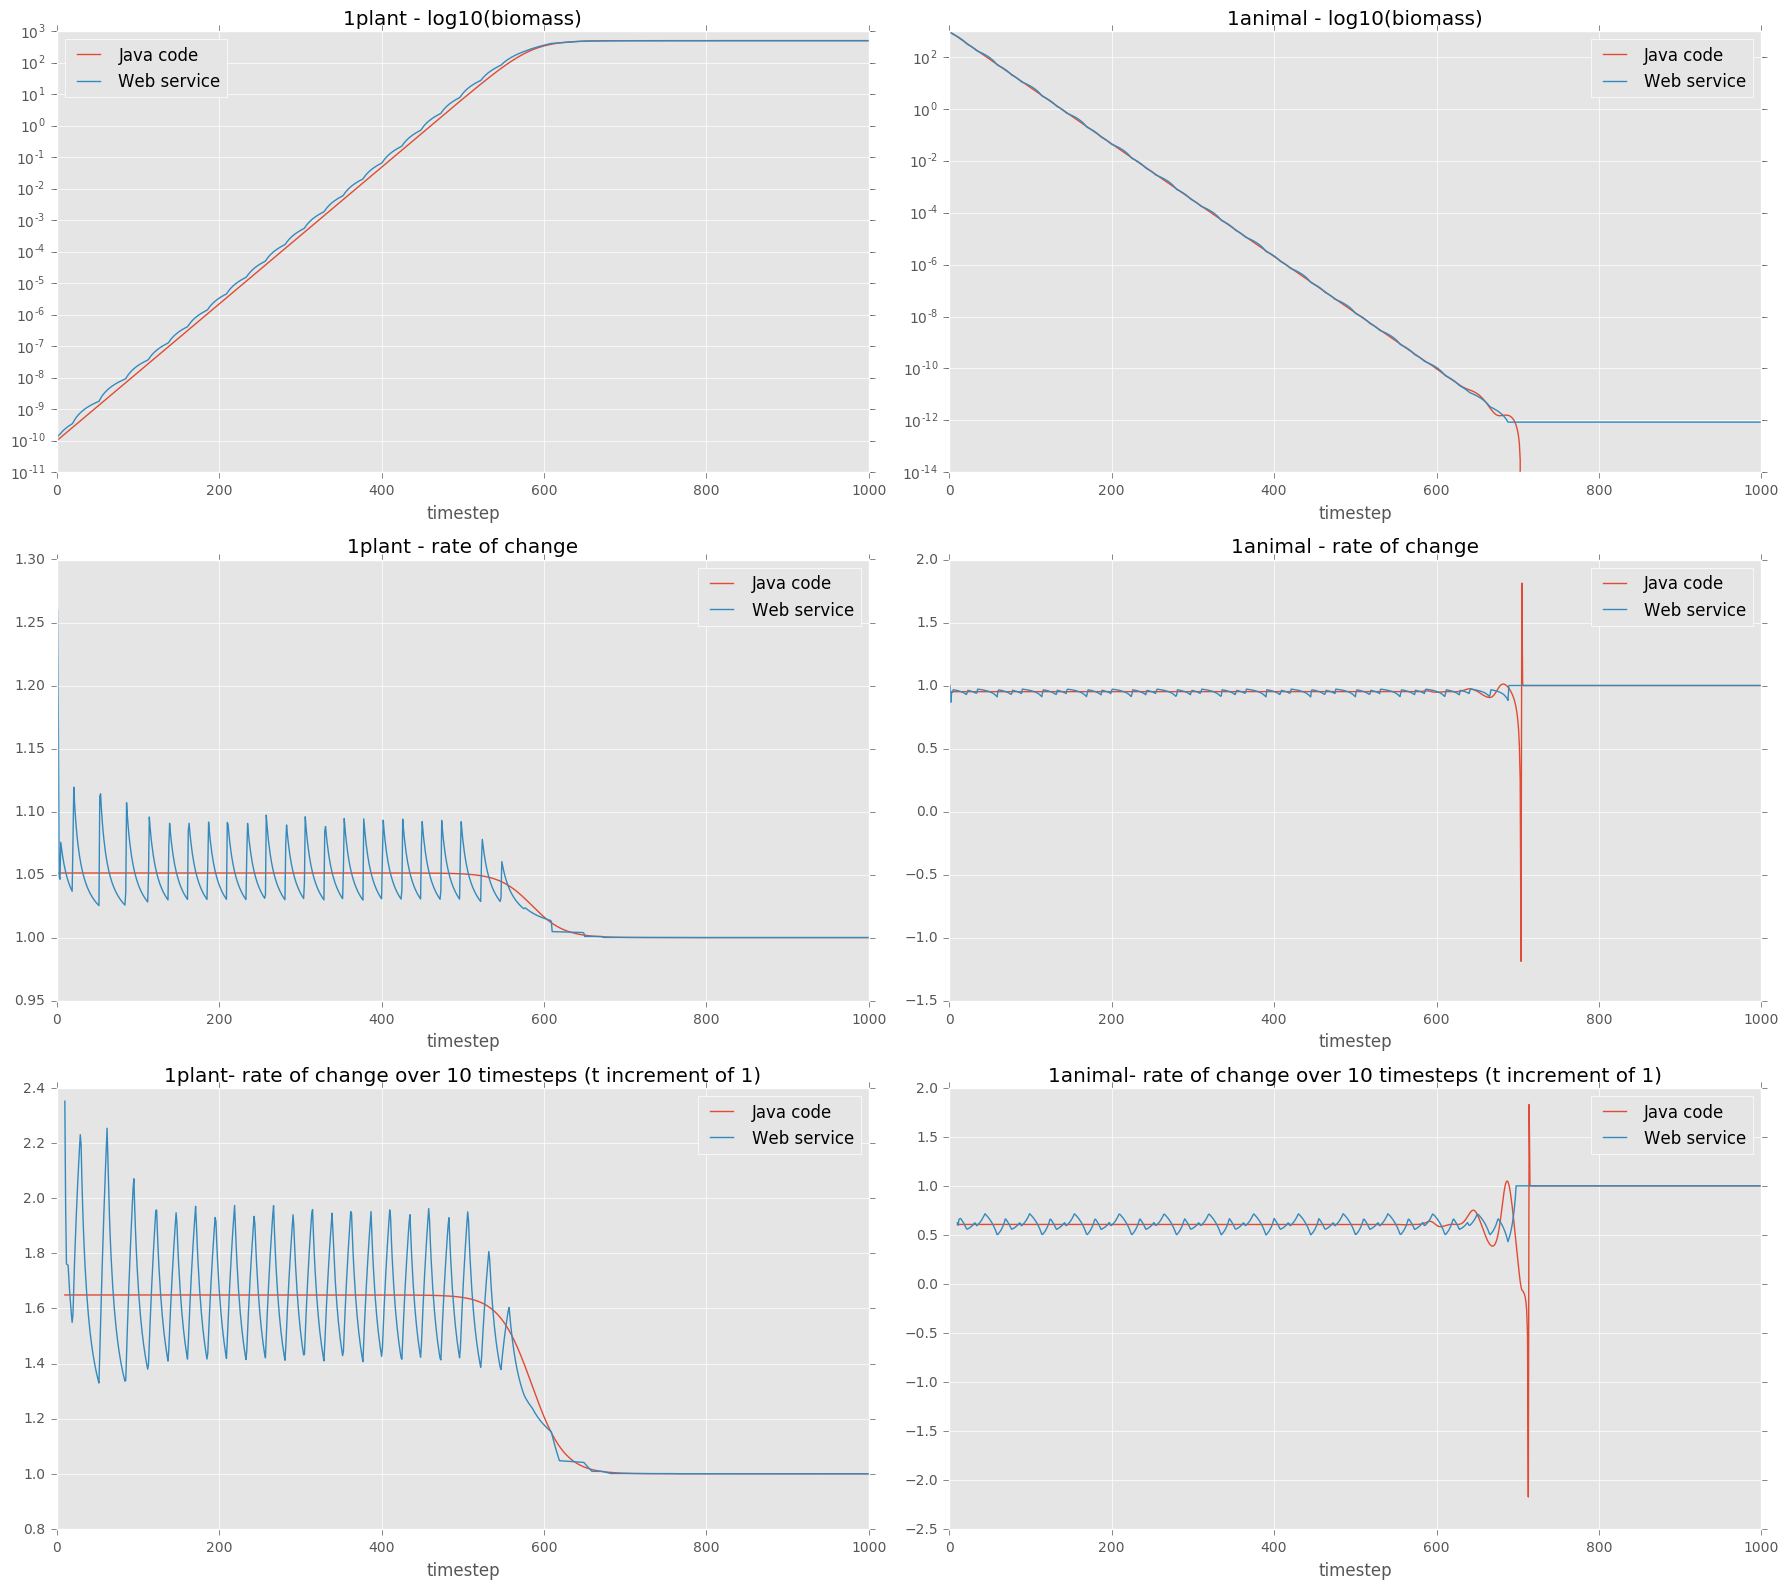

In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

import pandas as pd
from atntools import features

def plot_comparisons(file_prefix, plot_col):

    # Get biomass data
    datadir = '/Users/ben/SFSU/thesis/test-data/WS-comparison/'
    atn_data = features.get_simulation_data(datadir + file_prefix + '.ATN.h5')[2]
    ws_data = features.get_simulation_data(datadir + file_prefix + '.WS.csv')[2]
    biomass = pd.concat([atn_data, ws_data], axis=1)
    biomass.columns = "Java code", "Web service"

    # Plot biomass
    ax = biomass.plot(title=(file_prefix + " - log10(biomass)"), logy=True, ax=plt.subplot(320 + plot_col))
    ax.set_xlabel("timestep")

    # Plot rate of change
    change = biomass / biomass.shift(1)
    ax = change.plot(title=(file_prefix + " - rate of change"), ax=plt.subplot(322 + plot_col))
    ax.set_xlabel("timestep")

    # Plot rate of change over 10 timesteps (t increment of 1)
    change10 = biomass / biomass.shift(10)
    ax = change10.plot(title=(file_prefix + "- rate of change over 10 timesteps (t increment of 1)"), ax=plt.subplot(324 + plot_col))
    ax.set_xlabel("timestep")

plt.figure(figsize=(18, 16))
plot_comparisons('1plant', 1)
plot_comparisons('1animal', 2)
plt.tight_layout()